In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

In [89]:
# reads the data set from the file
data = pd.read_csv("SouthGermanCredit.csv")

In [90]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [91]:
data.shape

(1000, 21)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [93]:

corealtion_matrix = data.corr()
corealtion_matrix.style.background_gradient(cmap='coolwarm')

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
status,1.000000,-0.072013,0.192191,0.028783,-0.042695,0.222867,0.106339,-0.005280,0.043261,-0.127737,-0.042234,-0.032260,0.058631,0.068274,0.023335,0.076005,0.040663,0.014145,0.066296,0.035187,0.350847
duration,-0.072013,1.000000,-0.077186,0.147492,0.624988,0.047661,0.057381,0.074749,0.014789,-0.024490,0.034067,0.303971,-0.037550,-0.062884,0.153126,-0.011284,0.210910,0.023834,0.164718,0.134680,-0.214927
credit_history,0.192191,-0.077186,1.000000,-0.090336,-0.059915,0.039058,0.138225,0.044375,0.042171,-0.040676,0.063198,-0.053777,0.146337,0.159957,0.061428,0.437066,0.010350,-0.011550,0.052370,-0.028554,0.228785
purpose,0.028783,0.147492,-0.090336,1.000000,0.068480,-0.018684,0.016013,0.048369,0.000157,-0.017607,-0.038221,0.010966,-0.000892,-0.100230,0.013495,0.054935,0.008085,0.032577,0.078371,0.113244,-0.017979
amount,-0.042695,0.624988,-0.059915,0.068480,1.000000,0.064632,-0.008376,-0.271322,-0.016094,-0.027831,0.028917,0.311602,0.032273,-0.069392,0.133024,0.020785,0.285393,-0.017144,0.277000,0.030662,-0.154740
savings,0.222867,0.047661,0.039058,-0.018684,0.064632,1.000000,0.120950,0.021993,0.017349,-0.105069,0.091424,0.018948,0.083434,0.001908,0.006644,-0.021644,0.011709,-0.027514,0.087208,-0.010450,0.178943
employment_duration,0.106339,0.057381,0.138225,0.016013,-0.008376,0.120950,1.000000,0.126161,0.111278,-0.008116,0.245081,0.087187,0.259116,-0.007279,0.115077,0.125791,0.101225,-0.097192,0.060518,0.022845,0.116002
installment_rate,-0.005280,0.074749,0.044375,0.048369,-0.271322,0.021993,0.126161,1.000000,0.119308,-0.011398,0.049302,0.053391,0.057271,0.007894,0.091229,0.021669,0.097755,0.071207,0.014413,0.094762,-0.072404
personal_status_sex,0.043261,0.014789,0.042171,0.000157,-0.016094,0.017349,0.111278,0.119308,1.000000,0.050634,-0.027269,-0.006940,0.005150,-0.026747,0.098934,0.064672,-0.011956,-0.122165,0.027275,-0.073103,0.088184
other_debtors,-0.127737,-0.024490,-0.040676,-0.017607,-0.027831,-0.105069,-0.008116,-0.011398,0.050634,1.000000,-0.025678,-0.155450,-0.029826,-0.038235,-0.065449,-0.025447,-0.057963,-0.020400,-0.075035,-0.140190,0.025137


From co-orelation matrix following features are more directly/inversly related to credit_risk when compared to other features.
-> [status, credit_history, savings, amount, employment_duration, duration, property, other_installment_plans


In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
scaler.fit(data)
data_transform = scaler.transform(data)
data_transform.shape


(1000, 21)

In [96]:
from pandas import DataFrame

data_scaled = DataFrame(data_transform)

In [97]:
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.254566,-0.240857,1.344014,-0.301852,-0.787657,-0.699707,-1.145978,0.918477,-0.963650,-0.303686,...,-0.341055,-1.281573,0.460831,-1.751205,-0.704926,0.146949,0.428290,-0.823318,0.196014,0.654654
1,-1.254566,-0.987573,1.344014,-1.030963,-0.167384,-0.699707,-0.317959,-0.870183,0.449326,-0.303686,...,-1.293723,0.040363,0.460831,-1.751205,1.027079,0.146949,-2.334869,-0.823318,0.196014,0.654654
2,-0.459026,-0.738668,-0.503428,2.250036,-0.861381,-0.066488,0.510060,-0.870183,-0.963650,-0.303686,...,-1.293723,-1.105315,0.460831,-1.751205,-0.704926,-1.383771,0.428290,-0.823318,0.196014,0.654654
3,-1.254566,-0.738668,1.344014,-1.030963,-0.407341,-0.699707,-0.317959,0.024147,0.449326,-0.303686,...,-1.293723,0.304750,0.460831,-1.751205,1.027079,-1.383771,-2.334869,-0.823318,-5.101669,0.654654
4,-1.254566,-0.738668,1.344014,-1.030963,-0.389974,-0.699707,-0.317959,0.918477,0.449326,-0.303686,...,-0.341055,0.216621,-2.375050,0.135869,1.027079,-1.383771,0.428290,-0.823318,-5.101669,0.654654


#### Evaluating K using following techniques

In [98]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from yellowbrick.cluster import InterclusterDistance


In [99]:

# data not scaled
df_noScale = data.copy()
Y_noScale = df_noScale['credit_risk']
X_noScale = df_noScale.drop('credit_risk',1)


###### Elbow method

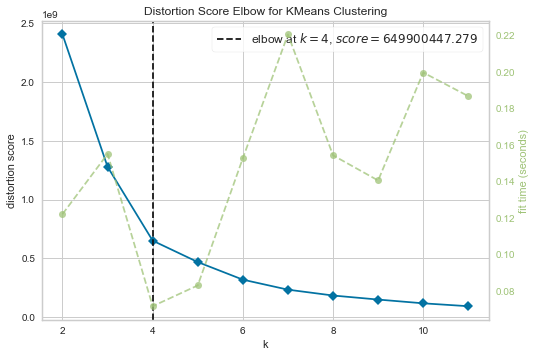

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:

model1 = KMeans()
visualizer_elbow = KElbowVisualizer(model1, k=(2,12))

visualizer_elbow.fit(X_noScale)       
visualizer_elbow.show()        

###### Silhoutte Plots

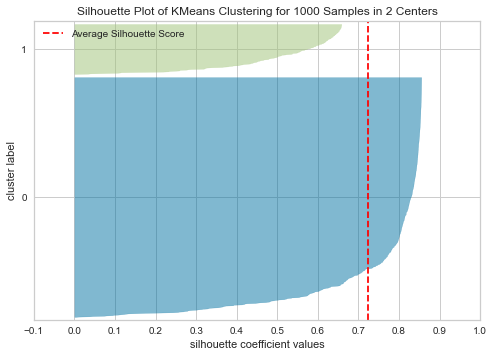

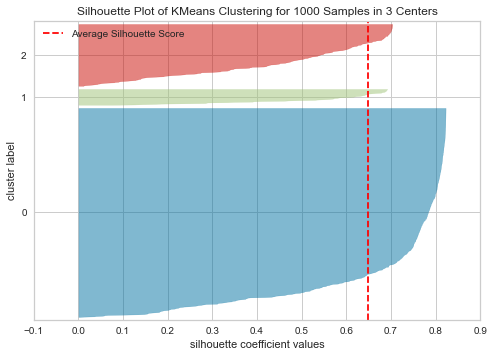

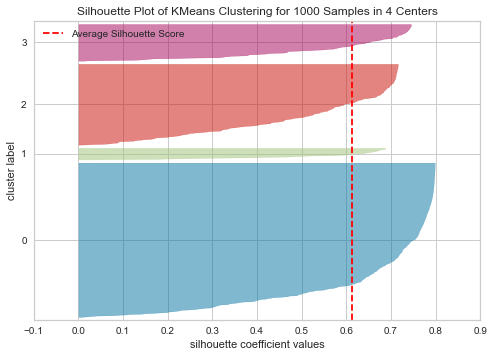

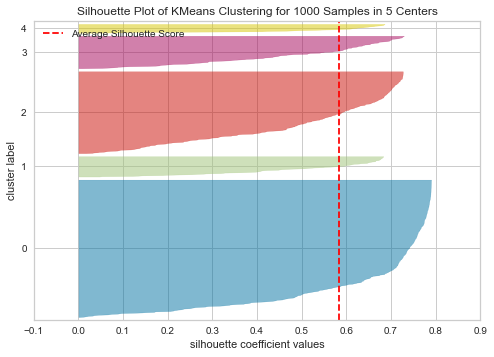

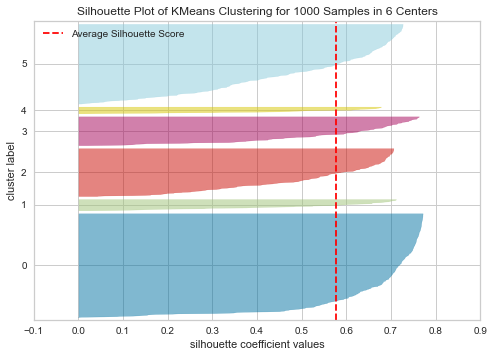

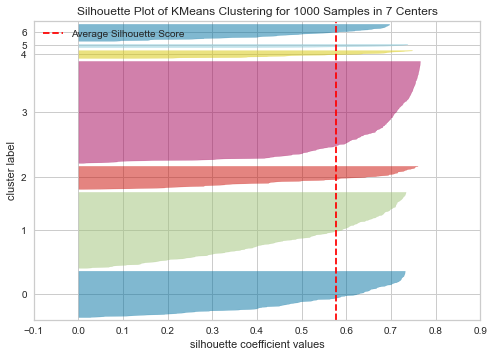

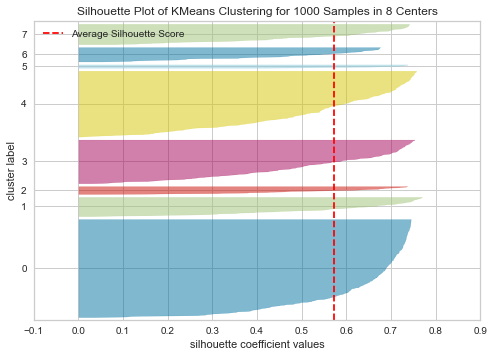

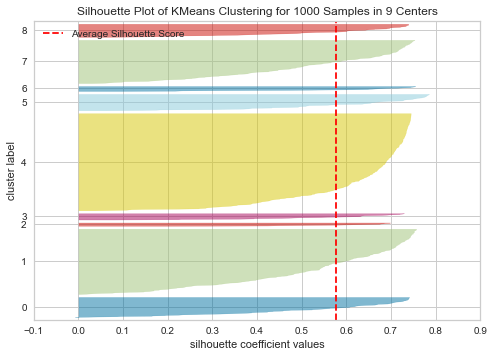

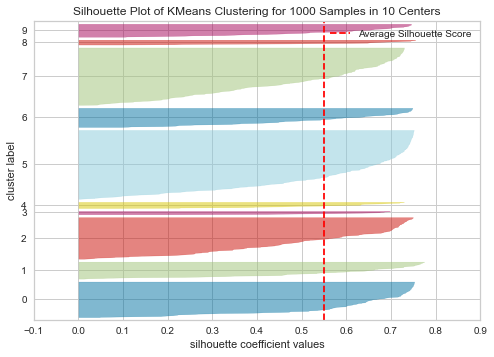

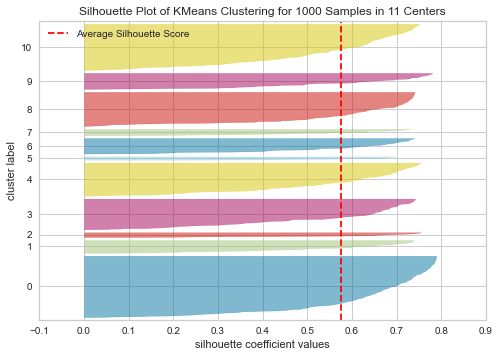

In [101]:
for i in range(2,12):
    model2 = KMeans(i, random_state=42)
    visualizer_silhoutte = SilhouetteVisualizer(model2, colors='yellowbrick')
    visualizer_silhoutte.fit(X_noScale)        
    visualizer_silhoutte.show()        

##### Intercluster Distance

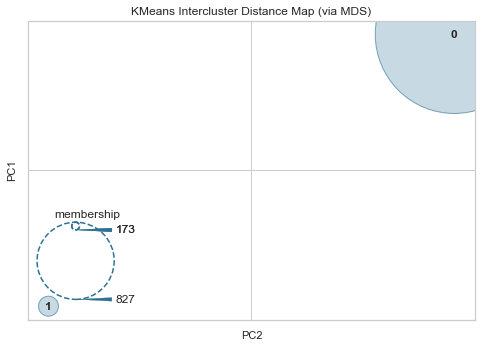

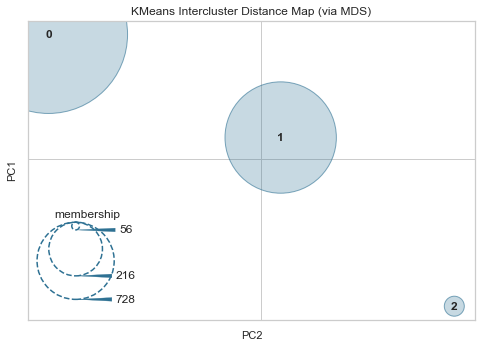

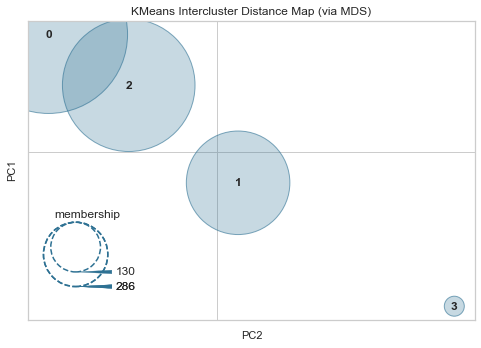

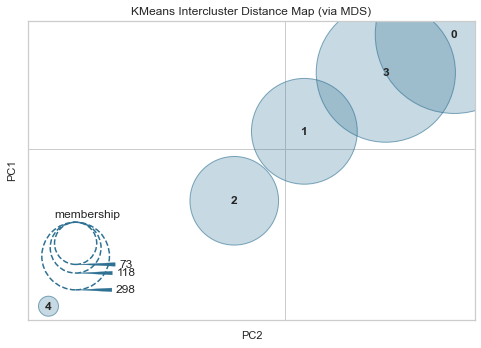

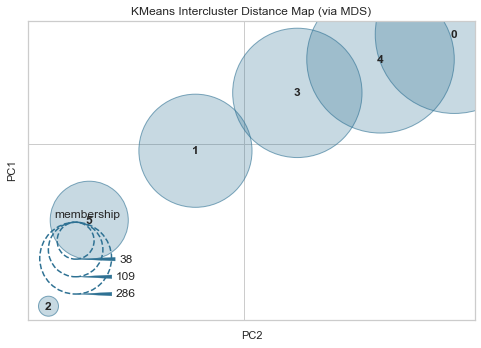

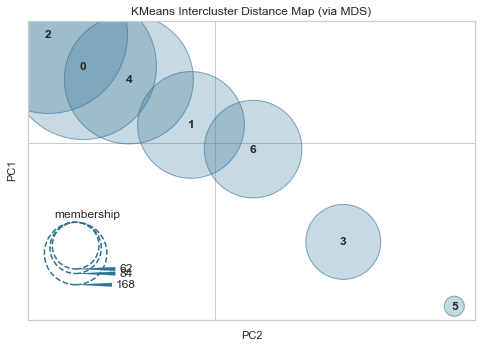

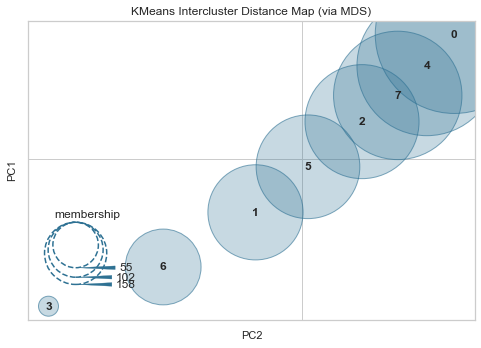

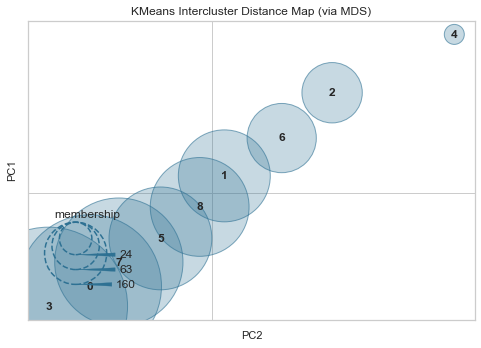

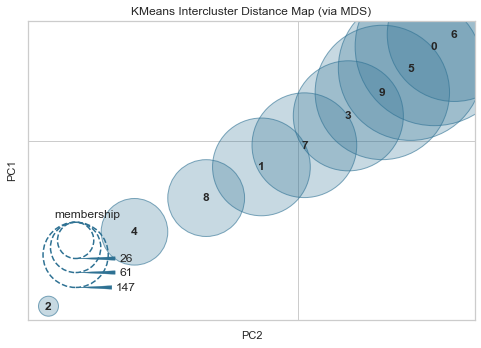

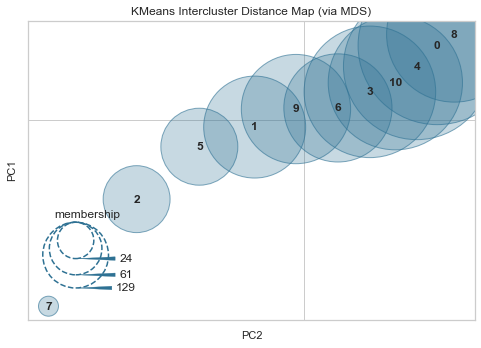

In [102]:
for i in range(2,12):
    model3 = KMeans(i)
    visualizer_intercluster = InterclusterDistance(model3)
    visualizer_intercluster.fit(X_noScale)        
    visualizer_intercluster.show()        

When using all data columns except target column (credit_risk) for clusteing, we get following K values
1. Elbow method -> K=4 show clear elbow dip
2. Silhouette method -> K=11 show clusters with equal width and silhouette score above average.
For other K vlaues from 2 to 10 cluster sizes are are not equal.
3. Intercluster distance -> K=5 almost all clusters are of equal sizes and most of clusters are closely distributed from each other

###### With scaled data evaluating K

In [74]:

# data scaled
df_scaled = data_scaled.copy()
y_scaled = df_scaled[20]
x_scaled = df_scaled.drop(20,1)


###### Elbow method

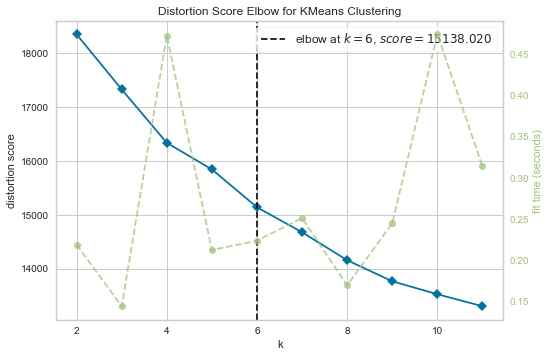

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [75]:

model4 = KMeans()
visualizer_elbow = KElbowVisualizer(model4, k=(2,12))

visualizer_elbow.fit(x_scaled)       
visualizer_elbow.show()

###### Silhouette method

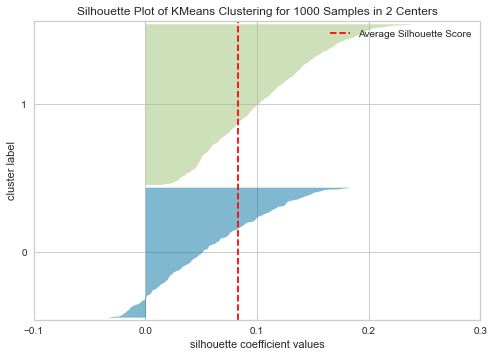

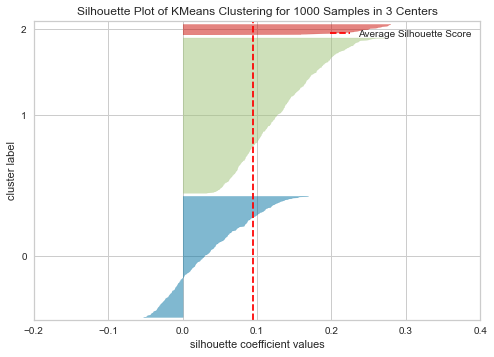

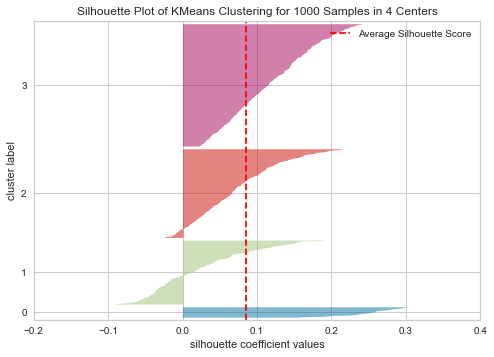

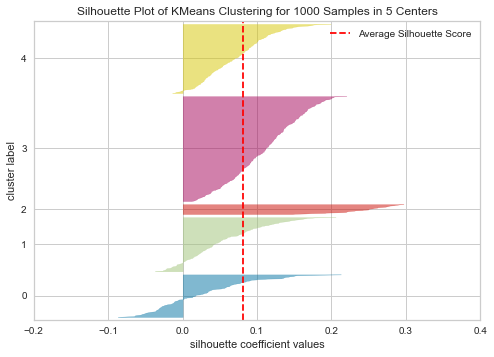

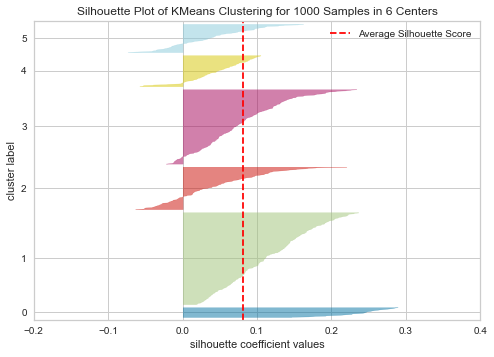

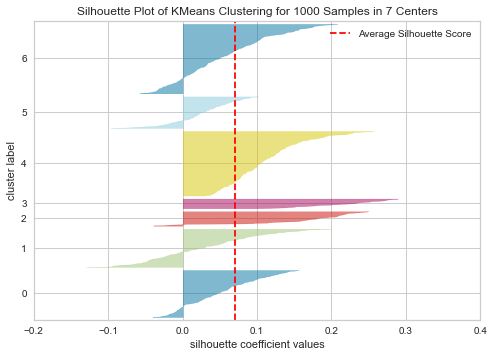

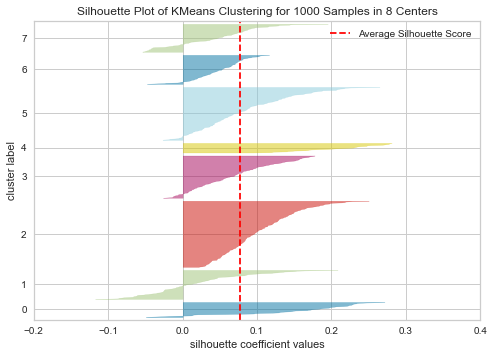

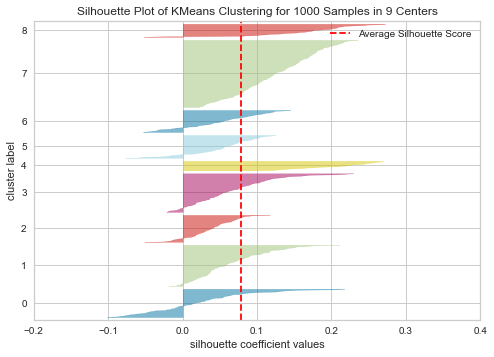

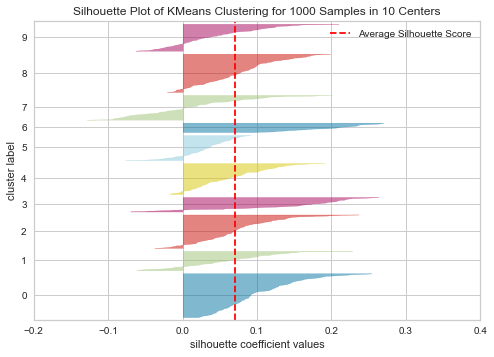

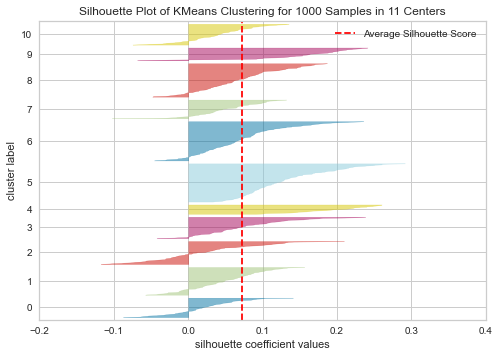

In [76]:
for i in range(2,12):
    model5 = KMeans(i, random_state=42)
    visualizer_silhoutte = SilhouetteVisualizer(model5, colors='yellowbrick')
    visualizer_silhoutte.fit(x_scaled)        
    visualizer_silhoutte.show() 

###### Intercluster Distance method

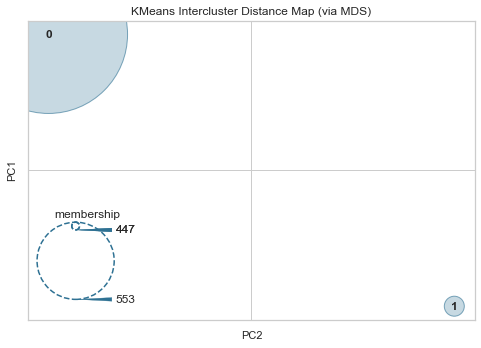

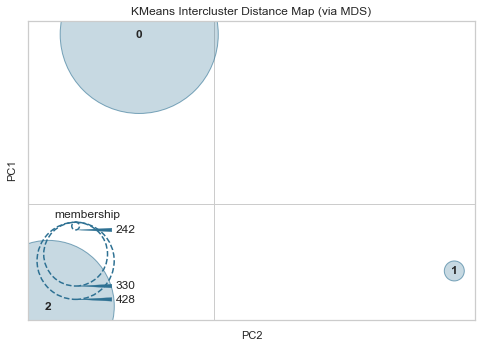

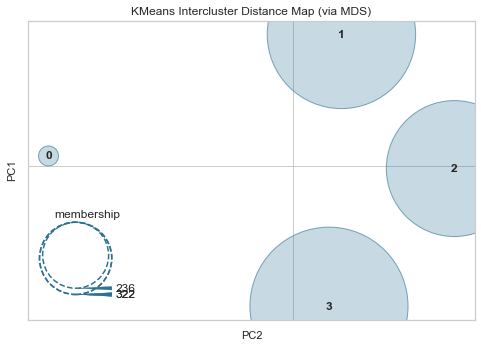

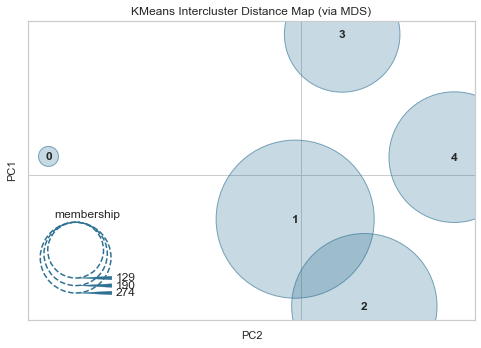

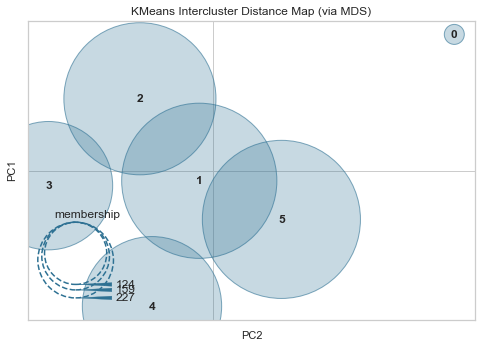

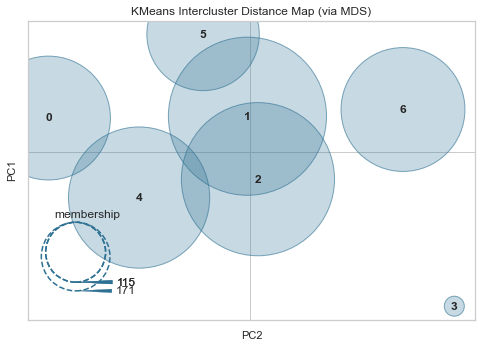

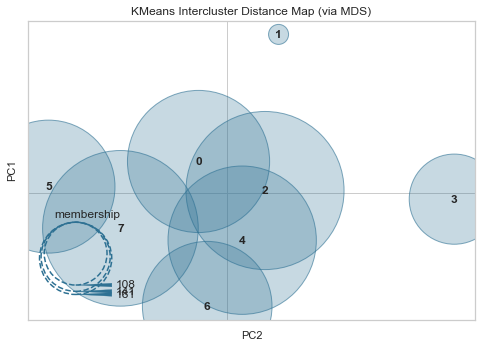

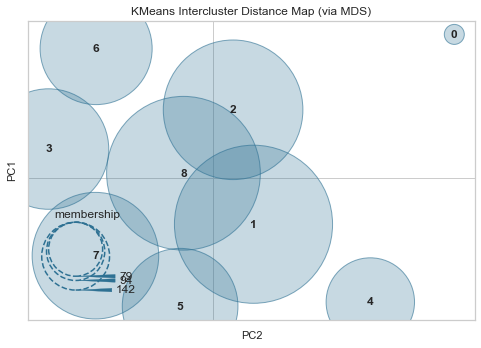

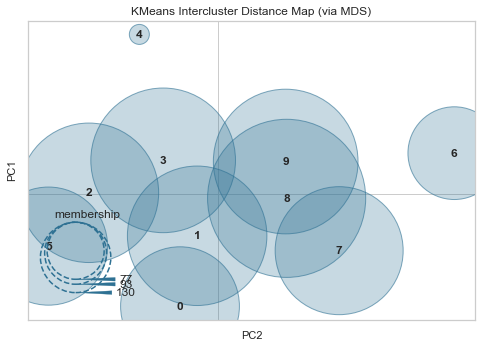

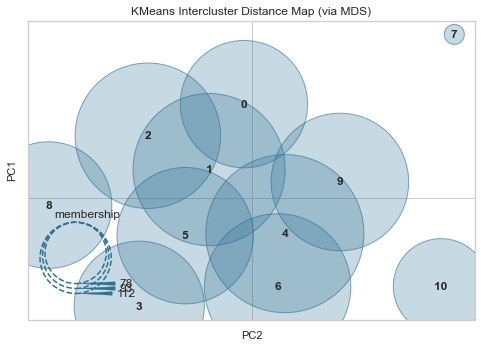

In [77]:
for i in range(2,12):
    model6 = KMeans(i)
    visualizer_intercluster = InterclusterDistance(model6)
    visualizer_intercluster.fit(x_scaled)        
    visualizer_intercluster.show()

When using all data columns except target column (credit_risk) for clusteing after scaling the data, we get following K values
1. Elbow method -> K=6 with no clear dip
2. Silhouette method -> For all K values from 2-12 clusters have unequal widths and clusters have negative silhouette coefficents. 
3. Intercluster distance -> For all K values from 2-12 clusters have equal sizes and most of clusters are closely distributed from each other.


###### With feature engineering evaluating K

In [78]:
#feature engineering

df_fe = data.copy()
x_fe = df_fe[['status', 'credit_history', 'savings', 'amount', 'employment_duration', 
              'duration', 'property', 'other_installment_plans']]
y_fe = df_fe['credit_risk']

###### Elbow method

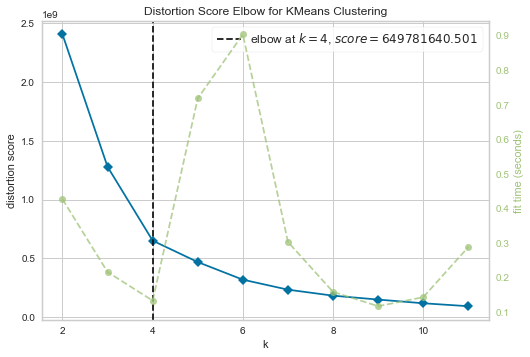

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:

model7 = KMeans()
visualizer_elbow = KElbowVisualizer(model7, k=(2,12))
visualizer_elbow.fit(x_fe)       
visualizer_elbow.show()

###### Silhouette method

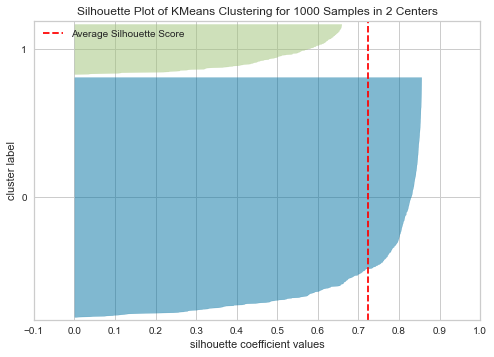

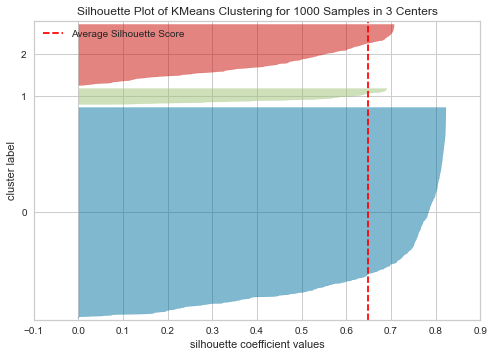

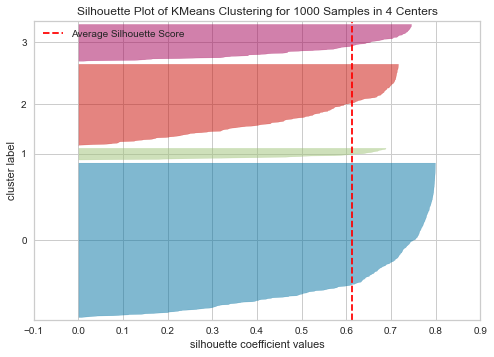

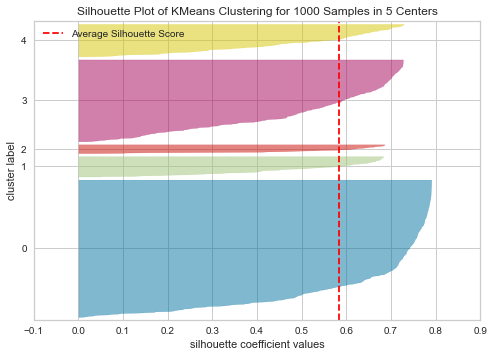

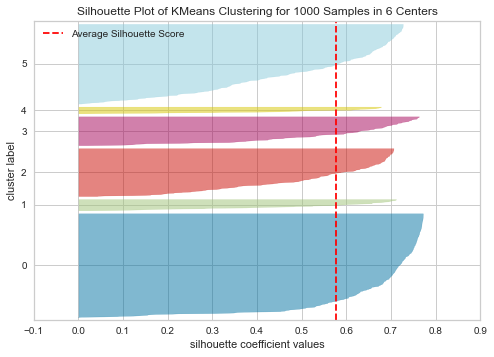

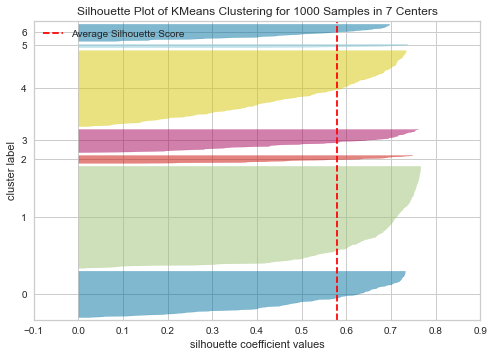

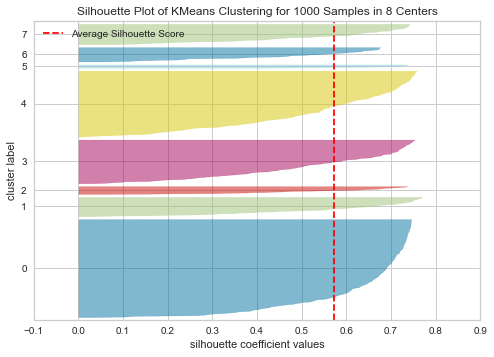

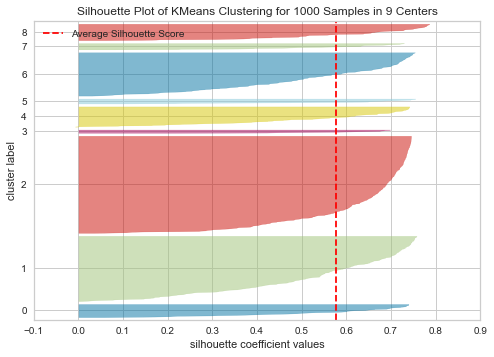

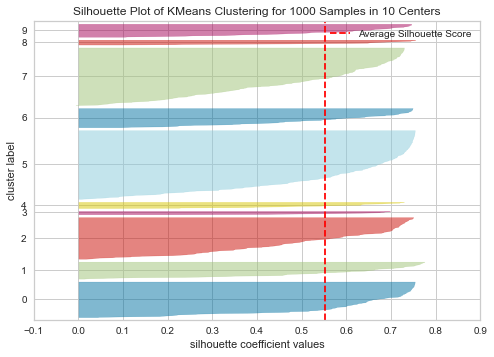

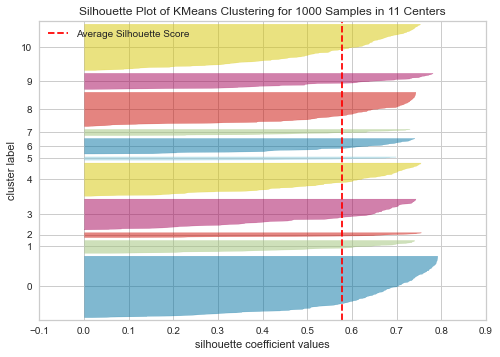

In [80]:
for i in range(2,12):
    model8 = KMeans(i, random_state=42)
    visualizer_silhoutte = SilhouetteVisualizer(model8, colors='yellowbrick')
    visualizer_silhoutte.fit(x_fe)        
    visualizer_silhoutte.show() 

###### Intercluster Distance method

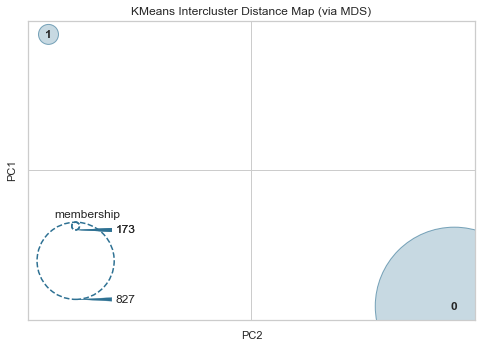

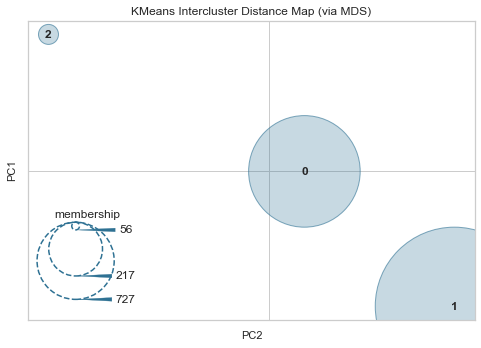

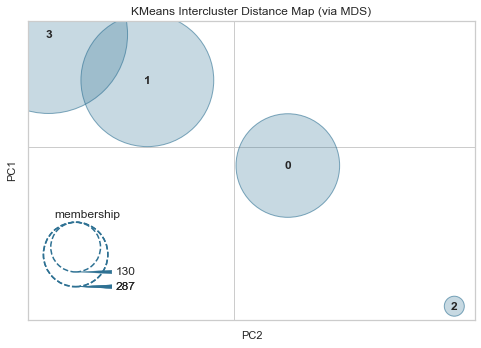

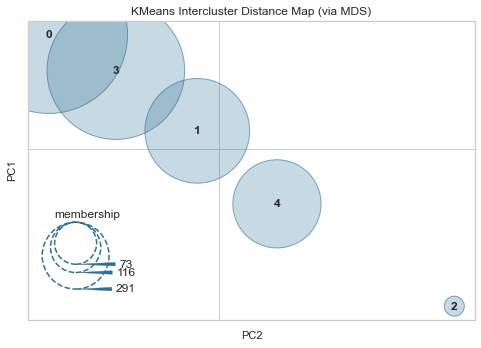

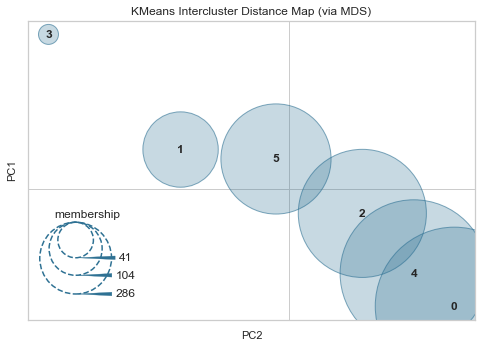

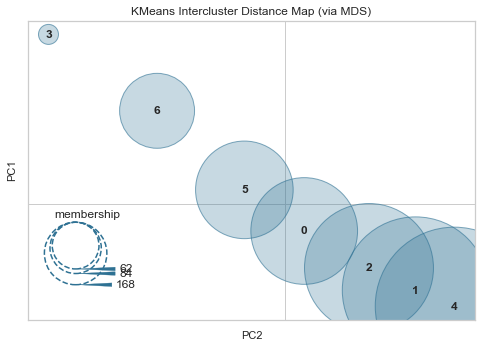

/Users/poojanadagouda/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


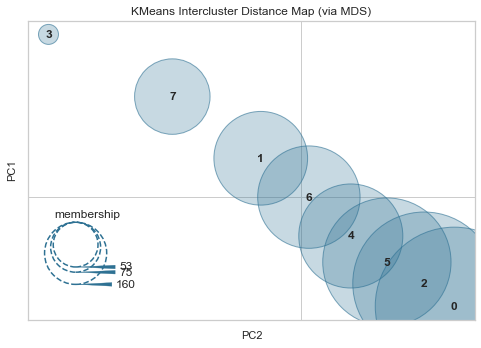

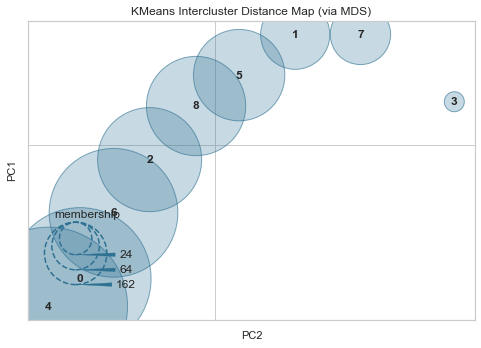

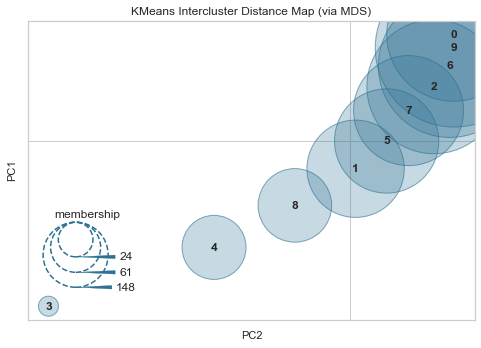

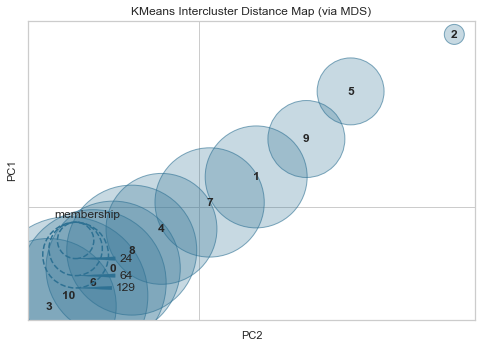

In [87]:
for i in range(2,12):
    model9 = KMeans(i)
    visualizer_intercluster = InterclusterDistance(model9)
    visualizer_intercluster.fit(x_fe)        
    visualizer_intercluster.show() 

When using 8 data columns for clusteing through feature engineering based on correlation matrix, we get following K values
1. Elbow method -> K=4 with no clear dip
2. Silhouette method -> K=11 shows clusters with equal width and silhouette score above average.
For other K vlaues from 2 to 10 cluster sizes are are not equal.
3. Intercluster distance -> K=5 almost all clusters are of equal sizes and most of clusters are closely distributed from each other